In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

c:\Users\Hiroshi\miniconda3\envs\oneforall\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ii 0
normal dataloader
4
(840, 5)
self.data_x (840, 5)
train 3725
normal dataloader
4
(840, 5)
self.data_x (169, 5)
val 370
normal dataloader
4
(840, 5)
self.data_x (288, 5)
test 965
len: 58
gpt2 = GPT2Model(
  (wte): Embedding(50257, 768)
  (wpe): Embedding(1024, 768)
  (drop): Dropout(p=0.1, inplace=False)
  (h): ModuleList(
    (0): GPT2Block(
      (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): GPT2Attention(
        (c_attn): Conv1D()
        (c_proj): Conv1D()
        (attn_dropout): Dropout(p=0.1, inplace=False)
        (resid_dropout): Dropout(p=0.1, inplace=False)
      )
      (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): GPT2MLP(
        (c_fc): Conv1D()
        (c_proj): Conv1D()
        (act): NewGELUActivation()
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
    (1): GPT2Block(
      (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): GPT2Attention(
        (c_attn): Conv1D()

15it [00:03,  4.48it/s]

total_time 1: 288
stitched_preds 1: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


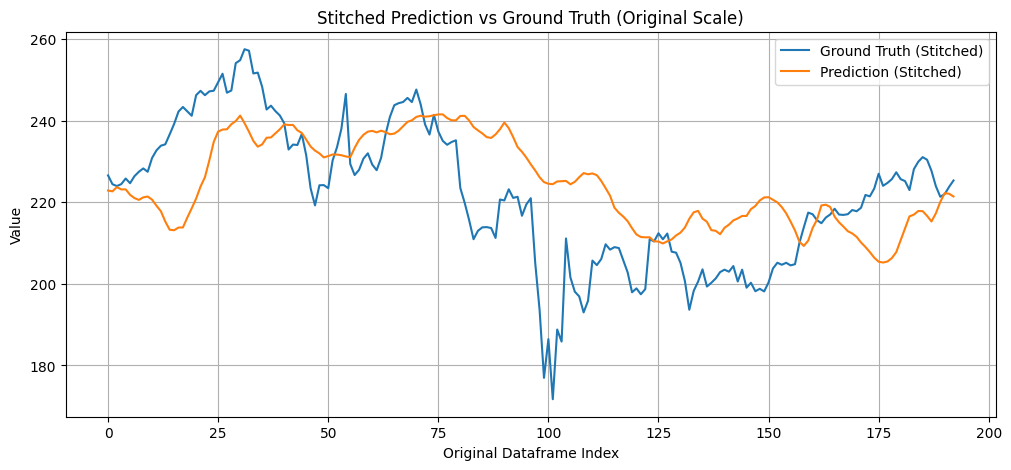

mse_mean = 242.9488, mse_std = 0.0000
mae_mean = 12.4830, mae_std = 0.0000
mae:12.482983256456974, mse:242.94879117831127, rmse:15.586814657854609, mape:5.814149249187108, mspe:0.005670199758850783, smape:5.6805011560692495, nd:0.05635274944758822


In [2]:
percent = 100
pred_len = 48

cmd = [
    # data paths & IDs
    "--root_path",     "./datasets/custom/",
    "--data_path",     "AAPL_xlstm_date.csv",
    "--model_id",     f"aapl_GPT4TS_og_{pred_len}_{percent}",

    # dataset settings
    "--data",         "custom2",
    "--features",     "M",           # defaults to 'M' anyway
    "--freq",         "0",           # parser expects int; '0' will get mapped to 'h'
    "--percent",      str(percent),
    "--target",       "Close",
    # "--embed",        "-",

    # sequence lengths
    "--seq_len",      "48",
    "--label_len",    "24",
    "--pred_len",     str(pred_len),

    # training hyperparams
    "--batch_size",   "64",
    "--num_workers",  "10",          # default is 10; adjust as needed
    "--learning_rate","0.001",
    "--train_epochs", "15",
    "--patience",     "5",
    "--lradj",        "type1",     # default
    "--decay_fac",    "0.75",

    # model architecture
    "--model",        "GPT4TS",
    "--pretrain",     "1",           # defaults
    "--freeze",       "1",
    "--is_gpt",       "1",
    "--gpt_layers",   "6",           # <— note the plural here
    "--e_layers",     "3",
    "--d_model",      "768",
    "--n_heads",      "4",
    "--d_ff",         "256",
    "--dropout",      "0.1",
    # "--enc_in",       "862",         # defaults
    "--enc_in",       "5",         # defaults
    # "--c_out",        "862",
    "--c_out",        "5",
    "--patch_size",   "16",
    "--stride",       "8",
    "--kernel_size",  "25",

    # scheduler
    "--cos",          "1",
    "--tmax",         "10",

    # loss
    "--loss_func",    "mse",         # default

    # seeds & misc
    "--itr",          "1",           # number of repeats
    "--hid_dim",      "16",          # default
    "--max_len",      "-1",          # default
]

# print("Running command:", " ".join(cmd))
# subprocess.run(cmd, check=True\

import main
if __name__ == "__main__":
    main.main(args=cmd)
    # pass

mae:0.6129, mse:0.7294, rmse:0.8540, smape:26.8512